In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
# read the local csv
data = pd.read_csv('Data/Mall_Customers.csv', encoding='unicode_escape')

In [3]:
# check the data
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# check the data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
# check the data description
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
# check the data shape
data.shape

(200, 5)

In [7]:
# see all object columns
data.select_dtypes(include=['object']).columns

Index(['Gender'], dtype='object')

In [8]:
# see all numeric columns
data.select_dtypes(include=['int64', 'float64']).columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [9]:
# check the missing values
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
# check the duplicated values
data.duplicated().sum()

0

In [11]:
# drop the duplicated values
data.drop_duplicates(inplace=True)

In [12]:
# 'Gemder' column into binary values
# Mapping dictionary
gender_mapping = {'Male': 0, 'Female': 1}

# Convert 'Gender' column to numeric
data['Gender'] = data['Gender'].map(gender_mapping)

# Optional: If you want to convert the column data type to int
data['Gender'] = data['Gender'].astype(int)

In [13]:
# check the data
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


I:\Anaconda\envs\learn\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
I:\Anaconda\envs\learn\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
I:\Anaconda\envs\learn\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level fun

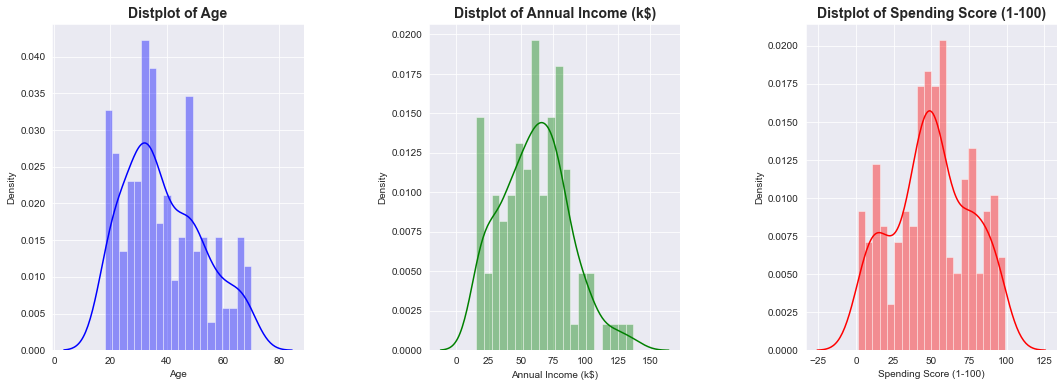

In [14]:
# plot a graph to see the distribution of the data
plt.figure(figsize=(18, 6))
n = 0
colors = ['blue', 'green', 'red']

for x, color in zip(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], colors):
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.distplot(data[x], bins=20, color=color)
    plt.title('Distplot of {}'.format(x), fontsize=14, fontweight='bold')  # Adjust fontsize and fontweight as needed

plt.show()

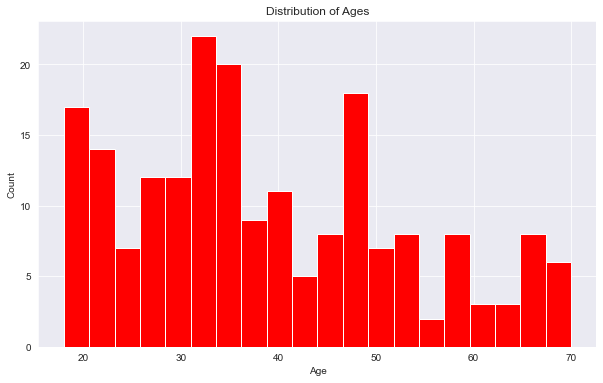

In [15]:
# plot a graph to see the exdending score of different ages
# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(data['Age'], bins=20, color='red')

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Ages')

# Display the histogram
plt.show()

I:\Anaconda\envs\learn\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


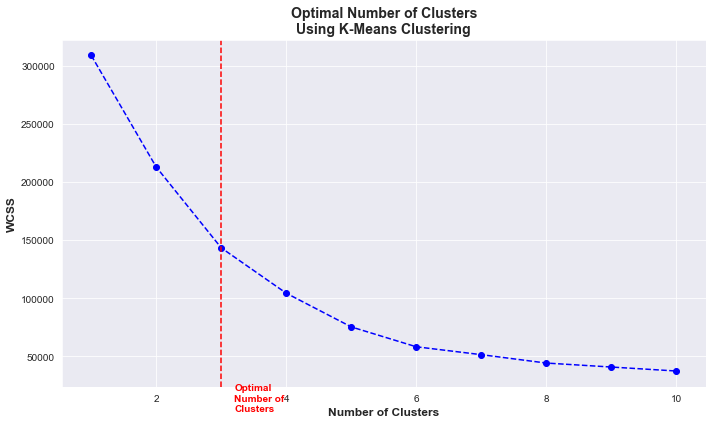

In [16]:
'''
Choosing the number of clusters
WCSS  ->  Within Clusters Sum of Squares
'''

# Calculate the Wcss for each cluster
# Calculate the WCSS for each cluster
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data.iloc[:, 1:])
    wcss.append(kmeans.inertia_)

# Plot the results into a line graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Clusters', fontsize=12, fontweight='bold')
plt.ylabel('WCSS', fontsize=12, fontweight='bold')
plt.title('Optimal Number of Clusters\nUsing K-Means Clustering', fontsize=14, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Highlighting the optimal number of clusters
plt.axvline(x=3, color='r', linestyle='--', linewidth=1.5)
plt.text(3.2, 3000, 'Optimal\nNumber of\nClusters', color='r', fontsize=10, fontweight='bold')

plt.grid(True)
plt.tight_layout()
plt.show()

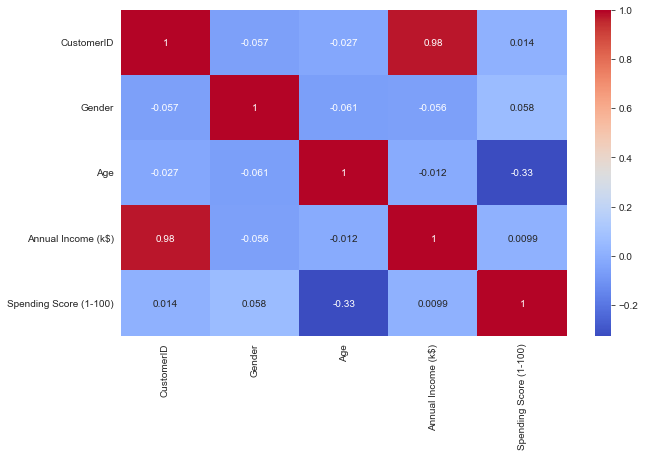

In [17]:
# find the correlating between the data
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

I:\Anaconda\envs\learn\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


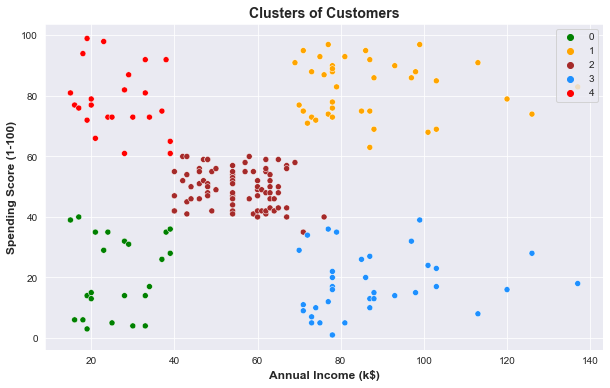

In [18]:
'''
Optimum Number of Clusters = 5
Training the k-Means Clustering Model
'''
# create a KMeans model
kmeans = KMeans(n_clusters=5, random_state=0)
# fit the model to the data
kmeans.fit(data.iloc[:, 1:])

# save the clusters to a DataFrame
data['Cluster'] = kmeans.labels_

# plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data['Annual Income (k$)'], data['Spending Score (1-100)'], hue=data['Cluster'],
                palette=['green', 'orange', 'brown', 'dodgerblue', 'red'])
plt.title('Clusters of Customers', fontsize=14, fontweight='bold')
plt.xlabel('Annual Income (k$)', fontsize=12, fontweight='bold')
plt.ylabel('Spending Score (1-100)', fontsize=12, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(loc='upper right', fontsize=10)
plt.show()

I:\Anaconda\envs\learn\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


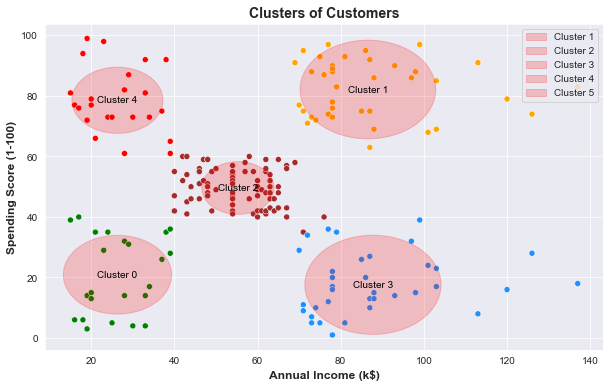

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data['Annual Income (k$)'], data['Spending Score (1-100)'], hue=data['Cluster'],
                palette=['green', 'orange', 'brown', 'dodgerblue', 'red'])
plt.title('Clusters of Customers', fontsize=14, fontweight='bold')
plt.xlabel('Annual Income (k$)', fontsize=12, fontweight='bold')
plt.ylabel('Spending Score (1-100)', fontsize=12, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Draw circles around each cluster
for cluster in data['Cluster'].unique():
    cluster_data = data[data['Cluster'] == cluster]
    x_center = cluster_data['Annual Income (k$)'].mean()
    y_center = cluster_data['Spending Score (1-100)'].mean()
    radius = max(cluster_data['Annual Income (k$)'].std(), cluster_data['Spending Score (1-100)'].std())
    circle = plt.Circle((x_center, y_center), radius, color='red', alpha=0.2)
    plt.gca().add_patch(circle)

    # Add cluster labels
    label = 'Cluster {}'.format(cluster)
    plt.text(x_center, y_center, label, fontsize=10, ha='center', va='center', color='black')

# Add names to the legend
cluster_names = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5']
plt.legend(cluster_names, loc='upper right', fontsize=10)

plt.show()

In [21]:
# what is next?
# 1.  done we can use the clusters to predict the spending score of new customers
# 2. done we can use the clusters to predict the spending score of new customers
# 3. we can use the clusters to predict the spending score of new customers
# 4. we can use the clusters to use the optimal number of clusters

In [45]:
X = data.iloc[:,[3,4]].values

In [46]:
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

I:\Anaconda\envs\learn\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


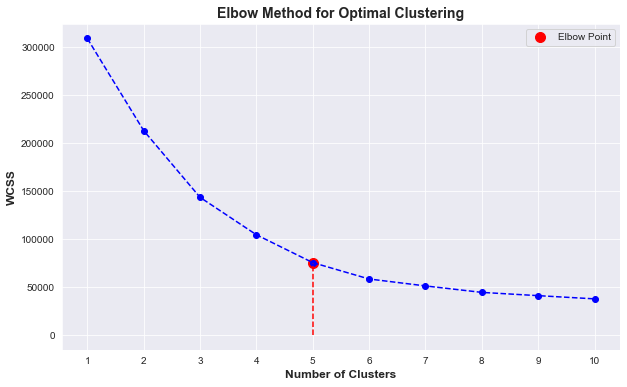

In [22]:
# Choosing right number of clusters
# Initialize an empty list to store the within-cluster sum of squares (WCSS)
wcss = []

# Determine the optimal number of clusters
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
    wcss.append(kmeans.inertia_)

# Plot the WCSS values
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Clusters', fontsize=12, fontweight='bold')
plt.ylabel('WCSS', fontsize=12, fontweight='bold')
plt.title('Elbow Method for Optimal Clustering', fontsize=14, fontweight='bold')
plt.xticks(range(1, 11), fontsize=10)
plt.yticks(fontsize=10)

# Highlight the elbow point with a red dot and a red line
elbow_point = (5, wcss[4])
plt.scatter(*elbow_point, marker='o', color='red', s=100, label='Elbow Point')
plt.plot([elbow_point[0], elbow_point[0]], [0, elbow_point[1]], color='red', linestyle='--')

plt.legend(loc='upper right', fontsize=10)

plt.show()

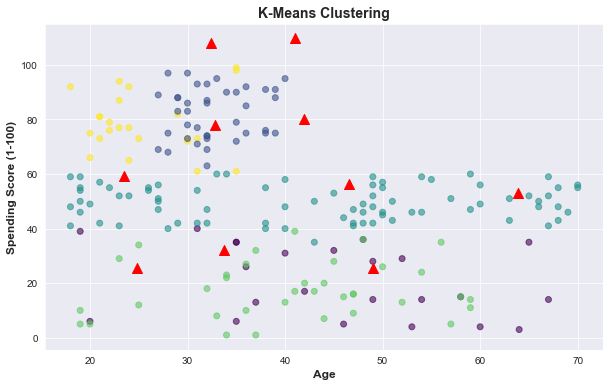

In [23]:
# create a DataFrame with the results
data_labels = pd.DataFrame(kmeans.labels_, columns=['Label'])
data_centers = pd.DataFrame(kmeans.cluster_centers_, columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])

# create a DataFrame with the results
data_labels = pd.DataFrame(kmeans.labels_, columns=['Label'])
data_centers = pd.DataFrame(kmeans.cluster_centers_, columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])

plt.figure(figsize=(10, 6))
plt.scatter(data['Age'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='viridis', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='^', c='red', s=100)
plt.xlabel('Age', fontsize=12, fontweight='bold')
plt.ylabel('Spending Score (1-100)', fontsize=12, fontweight='bold')
plt.title('K-Means Clustering', fontsize=14, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
plt.show()

In [24]:
# we can use the clusters to predict the spending score of new customers
# create a new customer
new_customer = pd.DataFrame({'Age': [40], 'Annual Income (k$)': [100], 'Spending Score (1-100)': [60]})
new_customer

,Age,Annual Income (k$),Spending Score (1-100)
0,40,100,60


In [25]:
# we can use the clusters to predict the spending score of new customers
# create a new customer
new_customer = pd.DataFrame({'Age': [40], 'Annual Income (k$)': [100], 'Spending Score (1-100)': [60]})
new_customer

,Age,Annual Income (k$),Spending Score (1-100)
0,40,100,60


In [47]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)

print(Y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


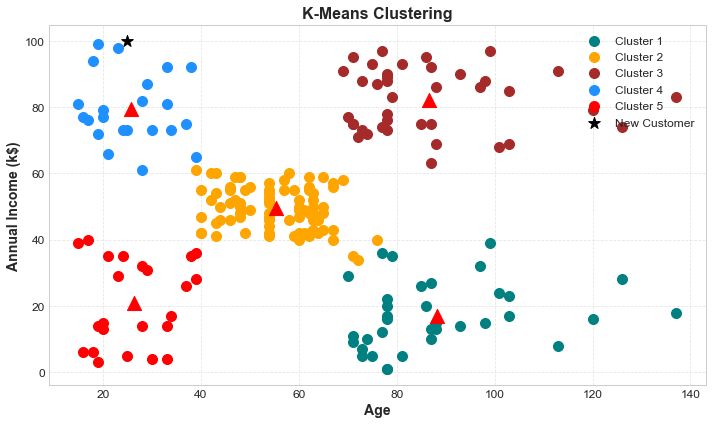

In [50]:
# Visualizing all the Clusters
# Define colors for the clusters
cluster_colors = ['#008080', '#FFA500', '#A52A2A', '#1E90FF', '#FF0000']

# Set up a professional-looking plot
plt.figure(figsize=(10, 6))
plt.style.use('seaborn-whitegrid')

# Scatter plot for each cluster
for i in range(5):
    plt.scatter(X[Y == i, 0], X[Y == i, 1], s=100, c=cluster_colors[i], label=f'Cluster {i+1}')

# Scatter plot for the new customer
plt.scatter(new_customer['Age'], new_customer['Annual Income (k$)'], s=150, c='black', marker='*', label='New Customer')

# Cluster center markers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='^', c='red', s=200)

# Graph labels and title
plt.xlabel('Age', fontsize=14, fontweight='bold')
plt.ylabel('Annual Income (k$)', fontsize=14, fontweight='bold')
plt.title('K-Means Clustering', fontsize=16, fontweight='bold')

# Legend and grid
plt.legend(loc='upper right', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

# Customize tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adjust spacing and borders
plt.tight_layout()

# Save the graph as a high-resolution image
plt.savefig('kmeans_clusters.png', dpi=300)

# Show the graph
plt.show()